In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from Neuron_layers import neuron_layer1, neuron_layer2
import os

In [2]:
data = pd.read_csv('datasets/mnist_train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [3]:
data2 = pd.read_csv('datasets/mnist_test.csv')

In [4]:
data2

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = data["label"]
y = np.array(y)
y = y.reshape(-1,1)
print(y.shape)

(60000, 1)


In [7]:
y_ = data2["label"]
y_ = np.array(y_)
y_ = y_.reshape(-1,1)
print(y_.shape)

(10000, 1)


In [8]:
col_idx = data.iloc(axis=1 )
x = np.array(col_idx[1:])
x.shape

(60000, 784)

In [9]:
col_idx_ = data2.iloc(axis=1 )
x_ = np.array(col_idx_[1:])
x_.shape

(10000, 784)

In [10]:
x_train , x_test , y_train , y_test = x , x_ , y , y_

In [11]:
encoder = OneHotEncoder(sparse_output=False, categories='auto')
Y_train_one_hot = encoder.fit_transform(y_train)
Y_test_one_hot = encoder.transform(y_test)

In [12]:
# Our network expects (features, examples), so we transpose back.
X_train =x_train.T
X_test =x_test.T
Y_train_o_h = Y_train_one_hot.T
Y_test_o_h = Y_test_one_hot.T

In [13]:
y_test_labels = y_test.flatten()
y_train_labels_flat = y_train.flatten()

In [14]:
print(X_train.shape)
print(X_test.shape)

(784, 60000)
(784, 10000)


In [518]:
learning_rate = 0.0037
epochs = 99
model_file = 'trained_model.npz'


In [519]:
pipeline_size = [784, 64, 10] 

layer1 = neuron_layer1(pipeline_size[0] , pipeline_size[1])
layer2 = neuron_layer2(pipeline_size[1], pipeline_size[2])

In [520]:
def train_model(epochs:int , learning_rate:float, X_train, Y_train_labels_flat, Y_train_one_hot):
    for i in range(epochs):
        # Fwd Prop
        A1 = layer1.forward(X_train)
        A2 = layer2.forward(A1)
        
        # bwd Prop
        dZ1, dW2, db2 = layer2.backward(A2, Y_train_one_hot, layer1.cache)
        dW1, db1 = layer1.backward(dZ1)
        
        # update weights and biases
        layer1.weights -= learning_rate * dW1
        layer1.biases -= learning_rate * db1
        layer2.weights -= learning_rate * dW2
        layer2.biases -= learning_rate * db2
        if i % 5 == 0:
            predictions = np.argmax(A2, axis=0)
            accuracy = np.sum(predictions == Y_train_labels_flat) / Y_train_labels_flat.size
            print(f"Epoch {i}: Training Accuracy = {accuracy:.4f}")

    print("Training finished")

    # --- 8. Save the Trained Model ---
    print(f"Saving trained parameters to {model_file}...")
    np.savez(model_file, 
             W1=layer1.weights, b1=layer1.biases,
             W2=layer2.weights, b2=layer2.biases,
             architecture=np.array(pipeline_size))
    print("Model saved.")


In [522]:
if os.path.exists(model_file):
        # Correctly handle user input
        choice = input("A trained model already exists. Should I overwrite it? (1 for Yes, 0 for No): ")
        if choice == "1":
            print("Overwriting existing model and starting new training...")
            train_model(epochs, learning_rate, X_train,  y_train_labels_flat,Y_train_o_h)
        else:
            print("Keeping existing model. No training will be performed.")
else:
        print("No saved model found. Starting training...")
        train_model(epochs, learning_rate, X_train, y_train_labels_flat, Y_train_o_h)

Overwriting existing model and starting new training...
Epoch 0: Training Accuracy = 0.9252
Epoch 5: Training Accuracy = 0.9264
Epoch 10: Training Accuracy = 0.9283
Epoch 15: Training Accuracy = 0.9294
Epoch 20: Training Accuracy = 0.9307
Epoch 25: Training Accuracy = 0.9315
Epoch 30: Training Accuracy = 0.9325
Epoch 35: Training Accuracy = 0.9335
Epoch 40: Training Accuracy = 0.9345
Epoch 45: Training Accuracy = 0.9356
Epoch 50: Training Accuracy = 0.9366
Epoch 55: Training Accuracy = 0.9375
Epoch 60: Training Accuracy = 0.9383
Epoch 65: Training Accuracy = 0.9392
Epoch 70: Training Accuracy = 0.9400
Epoch 75: Training Accuracy = 0.9408
Epoch 80: Training Accuracy = 0.9417
Epoch 85: Training Accuracy = 0.9424
Epoch 90: Training Accuracy = 0.9431
Epoch 95: Training Accuracy = 0.9439
Training finished
Saving trained parameters to trained_model.npz...
Model saved.


In [523]:
A1_test = layer1.forward(X_test)
A2_test = layer2.forward(A1_test)

# Get predictions
test_predictions = np.argmax(A2_test, axis=0)
test_accuracy = np.sum(test_predictions == y_test_labels) / y_test_labels.size

print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


Final Test Accuracy: 0.9422


In [524]:
def Classifier_digits(img: list[float]):
    model_file = "trained_model.npz"

    img_array = np.array(img).reshape(784, 1)
    image = img_array.reshape(28,28,1)
    plt.imshow(image)
    
    
    normalized_img = img_array / 255.0

    with np.load(model_file) as model_data:
        architecture = model_data['architecture']
        W1 = model_data['W1']
        b1 = model_data['b1']
        W2 = model_data['W2']
        b2 = model_data['b2']

    layer1 = neuron_layer1(input_size=architecture[0], output_size=architecture[1])
    layer2 = neuron_layer2(input_size=architecture[1], output_size=architecture[2])

    # 4. Set the trained parameters
    layer1.weights = W1
    layer1.biases = b1
    layer2.weights = W2
    layer2.biases = b2

    # 5. Run the prediction (Forward Pass)
    A1 = layer1.forward(normalized_img)
    A2 = layer2.forward(A1)
    
    # 6. Get the final prediction
    prediction = np.argmax(A2, 0)
    
    return prediction[0]



this Handwritten digit is = 0


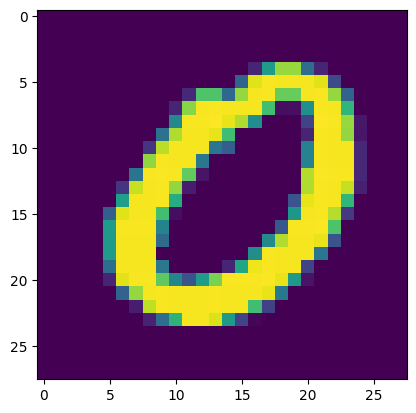

In [608]:
import random
r = random.randint(1,1000)
x = data2.iloc[:, 1:]
rows = x.iloc(axis=0)
img_array = rows[0:]
img_array = np.array(img_array)


print("this Handwritten digit is =",Classifier_digits(img_array[r]))